<h1> Wine Quality Predictor </h1>

In [216]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

In [51]:
data = pd.read_csv('winequality-red.csv', sep=';')

In [52]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


There are 1599 entries.

In [54]:
data.shape

(1599, 12)

<h2> Data Cleaning </h2>


In [55]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<p> No null values </p>

<h2> Analysing Data </h2>

In [56]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

So we have 6 different quality indices. Scale them between 0 - 5

In [57]:
data['quality'] = data['quality'] - 3

In [58]:
data['quality'].unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [59]:
corr = data.corr()

In [60]:
corr[corr[corr.columns] > 0.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,NaN,0.671703,NaN,NaN,NaN,NaN,0.668047,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,0.671703,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.667666,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.667666,1.000000,NaN,NaN,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


We see that there is not much correlation between different features.

<h2>Split data into test and train sets
</h2>

In [61]:
y = data.quality
X = data.drop('quality', axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

<h3>Scale the data</h3>

In [63]:
scaler = preprocessing.StandardScaler().fit(X_train)

<h2> Linear Regression </h2>

<p> We do not need to fit tune any hyperparameters for linear regression so we will not do cross validation. </p>

In [120]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>Fit Model</h3>

In [121]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h3> Predict on test set</h3>

In [122]:
lr_pred = lr.predict(X_test_scaled)
lr_score = r2_score(y_test, lr_pred)
lr_error = mean_squared_error(y_test, lr_pred)

<h2> Decision Tree Regressor </h2>


<h3> Make pipeline </h3>

In [185]:
pipeline = make_pipeline(preprocessing.StandardScaler(), DecisionTreeRegressor())

Hyperparameters for tuning

In [186]:
hyperparameters = { 'decisiontreeregressor__max_features' : ['auto', 'sqrt', 'log2'],'decisiontreeregressor__max_depth': [None, 5, 3, 1]}

<h3> Cross Validation </h3>

In [190]:
dt = GridSearchCV(pipeline, hyperparameters, cv=10)

<h3> Fit model </h3>

In [191]:
dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decisiontreeregressor', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'decisiontreeregressor__max_features': ['auto', 'sqrt', 'log2'], 'decisiontreeregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

<h3> Predict on test set </h3>

In [193]:
dt_pred = dt.predict(X_test)
dt_score = r2_score(y_test, dt_pred)
dt_error = mean_squared_error(y_test, dt_pred)

<h2> Random Forest Regressor </h2>

<h3> Make pipeline </h3>

In [194]:
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))

<p>Hyperparameters for tuning<p>

In [195]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],'randomforestregressor__max_depth': [None, 5, 3, 1]}

<h3> Cross Validation </h3>

In [196]:
rf = GridSearchCV(pipeline, hyperparameters, cv=10)

<h3> Fit the model </h3>

In [197]:
rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...mators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

<h3>Predictions on test set</h3>

In [198]:
rf_pred = rf.predict(X_test)
rf_score = r2_score(y_test, rf_pred)
rf_error = mean_squared_error(y_test, rf_pred)

<h2> Support Vector Machine Regressor</h2>

<h3> Make Pipeline </h3>

In [199]:
pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVR())

Hyperparameters for tuning

In [200]:
hyperparameters = {'svr__kernel' : ('linear', 'rbf'), 'svr__C':[0.1, 1, 10]}

<h3> Cross Validation </h3>

In [201]:
svr = GridSearchCV(pipeline, hyperparameters, cv=10)

<h3> Fit the model </h3>

In [202]:
svr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svr__kernel': ('linear', 'rbf'), 'svr__C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

<h3>Predict on test set</h3>

In [203]:
svr_pred = svr.predict(X_test)
svr_score = r2_score(y_test, svr_pred)
svr_error = mean_squared_error(y_test, svr_pred)

<h2> Evaluation Metrics and Model Comparisons </h2>

In [205]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest', 'SVM Regression', 'Decision Tree'],
    'Test set r2 score': [lr_score,rf_score,svr_score,dt_score],
     'Test set mean squared error': [lr_error, rf_error,svr_error,dt_error]})
models.sort_values(by='Test set r2 score', ascending=False)

,Model,Test set mean squared error,Test set r2 score
1,Random Forest,0.341682,0.470485
2,SVM Regression,0.382962,0.406512
0,Linear Regression,0.450014,0.302600
3,Decision Tree,0.492552,0.236677


<h2> Learning Curves </h2>

A function to plot learning curves

In [224]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

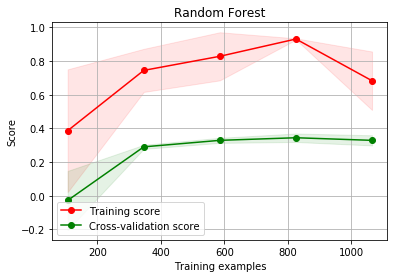

In [230]:
plt = plot_learning_curve(rf, 'Random Forest', scaler.transform(X), y)
plt.show()

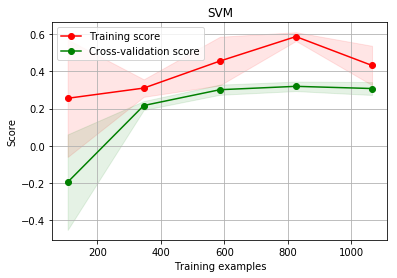

In [229]:
plt = plot_learning_curve(svr, 'SVM', scaler.transform(X), y)
plt.show()

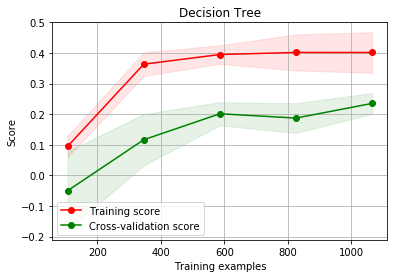

In [228]:
plt = plot_learning_curve(dt, 'Decision Tree', scaler.transform(X), y)
plt.show()

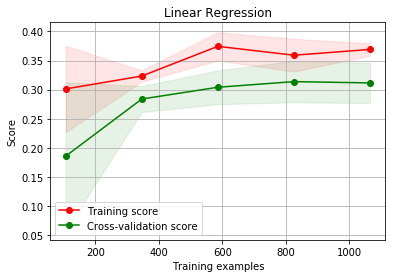

In [227]:
plt = plot_learning_curve(lr, 'Linear Regression', scaler.transform(X), y)
plt.show()

<p style="font-size:15px;">We see that for all the models Training and Cross-Validation scores finally become almost equal. This indicates that all the models suffer from high variance problem. Collecting more data can be a possible solution to this.</p>